In [ ]:
# microsoft azure deep learning for time series forecasting
!git clone https://github.com/paulsok/DeepLearningForTimeSeriesForecasting

Cloning into 'DeepLearningForTimeSeriesForecasting'...
remote: Enumerating objects: 487, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 487 (delta 1), reused 1 (delta 0), pack-reused 480
Receiving objects: 100% (487/487), 46.39 MiB | 30.81 MiB/s, done.
Resolving deltas: 100% (230/230), done.


In [ ]:
# import necessary packages
import os
import pandas as pd
import numpy as np

import statsmodels.api as sm
import warnings
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.preprocessing import StandardScaler
from math import sqrt

%matplotlib inline
warnings.filterwarnings("ignore")

from DeepLearningForTimeSeriesForecasting.common.utils import load_data
from DeepLearningForTimeSeriesForecasting.common.extract_data import extract_data

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
 # adjust the format of the data set
pd.options.display.float_format = '{:,.2f}'.format
np.set_printoptions(precision=2)

In [ ]:
# download ts_data set
# change the name of the directory with your folder name
!mkdir /content/energy
data_dir = '/content/energy/'

if not os.path.exists(os.path.join(data_dir, 'energy.csv')):
      # download and move the zip file
      !wget https://mlftsfwp.blob.core.windows.net/mlftsfwp/GEFCom2014.zip
      !mv GEFCom2014.zip /content/energy/
      # if not done already, extract zipped data and save as csv
      extract_data(data_dir)

--2021-08-06 10:34:38--  https://mlftsfwp.blob.core.windows.net/mlftsfwp/GEFCom2014.zip
Resolving mlftsfwp.blob.core.windows.net (mlftsfwp.blob.core.windows.net)... 52.239.155.196
Connecting to mlftsfwp.blob.core.windows.net (mlftsfwp.blob.core.windows.net)|52.239.155.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 126360077 (121M) [application/x-zip-compressed]
Saving to: ‘GEFCom2014.zip’

GEFCom2014.zip      100%[===================>] 120.51M  44.5MB/s    in 2.7s    

2021-08-06 10:34:41 (44.5 MB/s) - ‘GEFCom2014.zip’ saved [126360077/126360077]



In [ ]:
# load the data from csv into a pandas dataframe
ts_data_load = load_data(data_dir)
ts_data_load.head(10)

,load,temp
2012-01-01 00:00:00,"2,698.00",32.00
2012-01-01 01:00:00,"2,558.00",32.67
2012-01-01 02:00:00,"2,444.00",30.00
2012-01-01 03:00:00,"2,402.00",31.00
2012-01-01 04:00:00,"2,403.00",32.00
2012-01-01 05:00:00,"2,453.00",31.33
2012-01-01 06:00:00,"2,560.00",30.00
2012-01-01 07:00:00,"2,719.00",29.00
2012-01-01 08:00:00,"2,916.00",29.00
2012-01-01 09:00:00,"3,105.00",33.33


In [ ]:
ts_data_load.index

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 01:00:00',
               '2012-01-01 02:00:00', '2012-01-01 03:00:00',
               '2012-01-01 04:00:00', '2012-01-01 05:00:00',
               '2012-01-01 06:00:00', '2012-01-01 07:00:00',
               '2012-01-01 08:00:00', '2012-01-01 09:00:00',
               ...
               '2014-12-31 14:00:00', '2014-12-31 15:00:00',
               '2014-12-31 16:00:00', '2014-12-31 17:00:00',
               '2014-12-31 18:00:00', '2014-12-31 19:00:00',
               '2014-12-31 20:00:00', '2014-12-31 21:00:00',
               '2014-12-31 22:00:00', '2014-12-31 23:00:00'],
              dtype='datetime64[ns]', length=26304, freq='H')

In [ ]:
ts_data_load['2012-1':'2012-2-28'].head()

,load,temp
2012-01-01 00:00:00,"2,698.00",32.00
2012-01-01 01:00:00,"2,558.00",32.67
2012-01-01 02:00:00,"2,444.00",30.00
2012-01-01 03:00:00,"2,402.00",31.00
2012-01-01 04:00:00,"2,403.00",32.00


In [ ]:
# how many null values
ts_data_load.isna().sum()

load    0
temp    0
dtype: int64

In [ ]:
# data types
ts_data_load.dtypes

load    float64
temp    float64
dtype: object

In [ ]:
# summary statistics
ts_data_load.describe()

,load,temp
count,"26,304.00","26,304.00"
mean,"3,303.77",47.77
std,564.58,19.34
min,"1,979.00",-13.67
25%,"2,867.00",32.67
50%,"3,364.00",48.33
75%,"3,690.00",63.67
max,"5,224.00",95.00


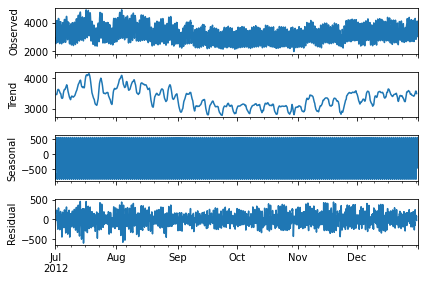

In [ ]:
load = ts_data_load.load
decomposition = sm.tsa.seasonal_decompose(load['2012-07-01':'2012-12-31'], model = 'additive')
fig = decomposition.plot()
plt.rcParams['figure.figsize'] = [18.0, 9.0]

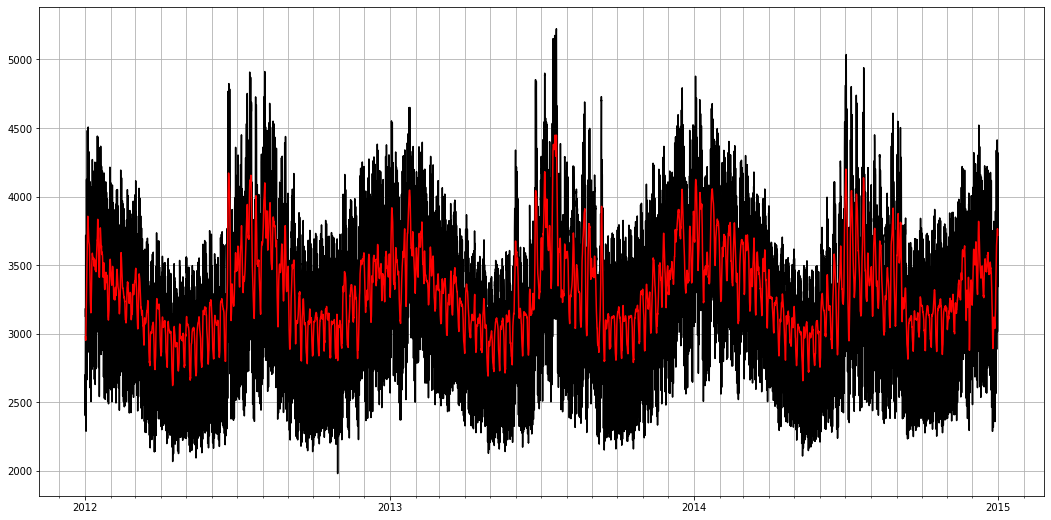

In [ ]:
# time series load value and trend decomposition plot
decomposition = sm.tsa.seasonal_decompose(load, model = 'additive')
fig, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=1)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')

ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(load.index, load, c='black')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

In [ ]:
values = load.values
values = values.reshape((len(values), 1))

# train the standardization
scaler = StandardScaler()
scaler = scaler.fit(values)
print('Mean: %f, StandardDeviation: %f' % (scaler.mean_, sqrt(scaler.var_)))

Mean: 3303.769199, StandardDeviation: 564.568521


In [ ]:
# datetime features
ts_data_load['hour'] = [ts_data_load.index[i].hour for i in range(len(ts_data_load))]
ts_data_load['month'] = [ts_data_load.index[i].month for i in range(len(ts_data_load))]
ts_data_load['dayofweek'] = [ts_data_load.index[i].day for i in range(len(ts_data_load))]
ts_data_load.head()

,load,temp,hour,month,dayofweek
2012-01-01 00:00:00,"2,698.00",32.00,0,1,1
2012-01-01 01:00:00,"2,558.00",32.67,1,1,1
2012-01-01 02:00:00,"2,444.00",30.00,2,1,1
2012-01-01 03:00:00,"2,402.00",31.00,3,1,1
2012-01-01 04:00:00,"2,403.00",32.00,4,1,1


In [ ]:
# create lag features
def generated_lagged_features(ts_data, var, max_lag):
  for t in range(1, max_lag+1):
    ts_data[var+'_lag'+str(t)] = ts_data[var].shift(t, freq='1H')


generated_lagged_features(ts_data_load, 'load', 8)
generated_lagged_features(ts_data_load, 'temp', 8)
ts_data_load.head()

,load,temp,hour,month,dayofweek,load_lag1,load_lag2,load_lag3,load_lag4,load_lag5,load_lag6,load_lag7,load_lag8,temp_lag1,temp_lag2,temp_lag3,temp_lag4,temp_lag5,temp_lag6,temp_lag7,temp_lag8
2012-01-01 00:00:00,"2,698.00",32.00,0,1,1,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2012-01-01 01:00:00,"2,558.00",32.67,1,1,1,"2,698.00",nan,nan,nan,nan,nan,nan,nan,32.00,nan,nan,nan,nan,nan,nan,nan
2012-01-01 02:00:00,"2,444.00",30.00,2,1,1,"2,558.00","2,698.00",nan,nan,nan,nan,nan,nan,32.67,32.00,nan,nan,nan,nan,nan,nan
2012-01-01 03:00:00,"2,402.00",31.00,3,1,1,"2,444.00","2,558.00","2,698.00",nan,nan,nan,nan,nan,30.00,32.67,32.00,nan,nan,nan,nan,nan
2012-01-01 04:00:00,"2,403.00",32.00,4,1,1,"2,402.00","2,444.00","2,558.00","2,698.00",nan,nan,nan,nan,31.00,30.00,32.67,32.00,nan,nan,nan,nan
